In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
#importing the required libraries to perform EDA

In [2]:
df = pd.read_csv('day.csv')
#Loading the acquired data - Data Sourcing

In [3]:
df.head()
#Viewing Data to confirm that data is loaded

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Now we will do data cleaning actions such as 
1) Fixing rows and columns \
2) Checking the nulls \
3) Dropping unnecessary columns \
4) Standardising the missing values \
5) Fixing outliers etc 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


1) Above we can see that all the columns belong to Non Null category so no need to check for nulls again \
2) As we can see all the data types match the type it is designed for except dtetime \
3) we will convert that column in to date time format and extract the necessary columns \
4) Names of the columns are not standardised we will rename it in to more readable format \
5) Instant column is basically the serial numbers so I think we don't need in the coming steps we will conisder whether it's useful or not and drop it 

In [5]:
df.isna().sum()
# This confirms there are no null values in the dataframe

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.rename(columns={'dteday':'Date','season':'Season','yr':'Year','mnth':'Month','holiday':'Holiday_During_WorkingDay','weekday':'Weekday','workingday':'Workingday','weathersit':'Weather_Situation','temp':'Temperature','atemp':'Actual_Temperature','hum':'Humidity','windspeed':'Windspeed','casual':'Casual_Users','registered':'Registered_Users','cnt':'Total_Count'},inplace=True)
#Renaming the columns

In [7]:
df['Season'].value_counts()

3    188
2    184
1    180
4    178
Name: Season, dtype: int64

In [8]:
# In the above block we renamed the entire columns in to more understandable and readable format lets see the change
df.head()
#Date is better understandable and readable than dteday , and it's thesame case with other columns

,instant,Date,Season,Year,Month,Holiday_During_WorkingDay,Weekday,Workingday,Weather_Situation,Temperature,Actual_Temperature,Humidity,Windspeed,Casual_Users,Registered_Users,Total_Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

df['Month'] = pd.DatetimeIndex(df['Date']).month

In [11]:
df.drop(['instant','Date','Holiday_During_WorkingDay','Casual_Users','Registered_Users',],axis=1,inplace=True)

In [12]:
df.head()
# As we can see the instant column is dropped and the data is below

,Season,Year,Month,Weekday,Workingday,Weather_Situation,Temperature,Actual_Temperature,Humidity,Windspeed,Total_Count
0,1,2018,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,2018,2,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,2018,3,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,2018,4,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,2018,5,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Converting the Season column values into categorical variables because it will be easy to analyze 1:spring, 2:summer, 3:fall, 4:winter
def season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

df['Season'] = df['Season'].apply(season)


In [14]:
# Converting the Weathersituaton column values into categorical variables because it will be easy to determine importance of variables
def Weathersituaton(x):
    if x==1:
        return 'Clear'
    elif x==2:
        return 'Misty'
    else:
        return 'Snowy'

df['Weather_Situation'] = df['Weather_Situation'].apply(Weathersituaton)

# As you can see that we replaced them with categorical variables

In [15]:
# Converting the Workingday column values into categorical variables because it will be easy to determine importance of variables
def Week_day(x):
    if x==0:
        return 'Sunday'
    elif x==1:
        return 'Monday'
    elif x==2:
        return 'Tuesday'
    elif x==3:
        return 'Wednesday'
    elif x==4:
        return 'Thursday'
    elif x==5:
        return 'Friday'
    else:
        return 'Saturday'

df['Weekday'] = df['Weekday'].apply(Week_day)

# As you can see that we replaced them with categorical variables and it will be easy do determine few of the things during analysis

In [16]:
# Converting the Workingday column values into categorical variables because it will be easy to determine importance of variables
def Working_Day(x):
    if x==1:
        return 'Working day'
    else:
        return 'Holiday'

df['Workingday'] = df['Workingday'].apply(Working_Day)


In [17]:
change = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Month'] = df['Month'].map(change)
df.head()

,Season,Year,Month,Weekday,Workingday,Weather_Situation,Temperature,Actual_Temperature,Humidity,Windspeed,Total_Count
0,spring,2018,Jan,Saturday,Holiday,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Feb,Sunday,Holiday,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Mar,Monday,Working day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Apr,Tuesday,Working day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,May,Wednesday,Working day,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
chang = {2019 :1, 2018:0}
df['Year'] = df['Year'].map(chang)
df.head()

,Season,Year,Month,Weekday,Workingday,Weather_Situation,Temperature,Actual_Temperature,Humidity,Windspeed,Total_Count
0,spring,0,Jan,Saturday,Holiday,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Feb,Sunday,Holiday,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Mar,Monday,Working day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Apr,Tuesday,Working day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,May,Wednesday,Working day,Clear,9.305237,11.46350,43.6957,12.522300,1600


# UNI VARIATE ANALYSIS

In [19]:
df['Temperature'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: Temperature, dtype: float64

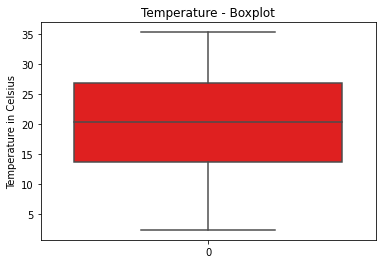

In [20]:
sns.boxplot(data=df['Temperature'],color='red')
plt.title('Temperature - Boxplot')
plt.ylabel('Temperature in Celsius',)
plt.show()
#observation
# As we can see there are no outliers
# The mean temperature is around 14-26 degrees in celsius

In [21]:
df['Actual_Temperature'].describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: Actual_Temperature, dtype: float64

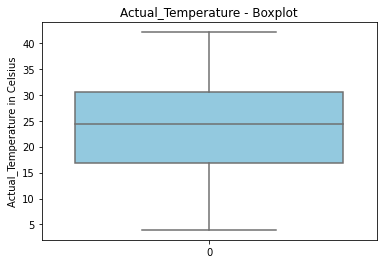

In [22]:
sns.boxplot(data=df['Actual_Temperature'],color='skyblue')
plt.title('Actual_Temperature - Boxplot')
plt.ylabel('Actual_Temperature in Celsius')
plt.show()
#observation
# As we can see there are no outliers
# The mean temperature is around 16-30 degrees in celsius
# There is a variation between Temperature and Actual_temperature

In [23]:
df['Humidity'].describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: Humidity, dtype: float64

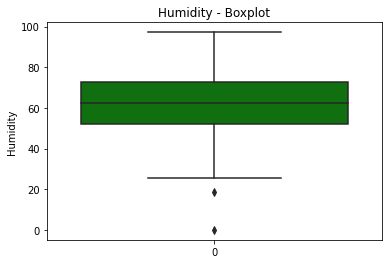

In [24]:
sns.boxplot(data=df['Humidity'],color='green')
plt.title('Humidity - Boxplot')
plt.ylabel('Humidity')
plt.show()
#observation
# As we can see there are 2 outliers below the lower threshold
# The mean Humidity is around 60 

In [25]:
# now we will remove all the outliers by taking less than 19
df=df[df['Humidity']>19]

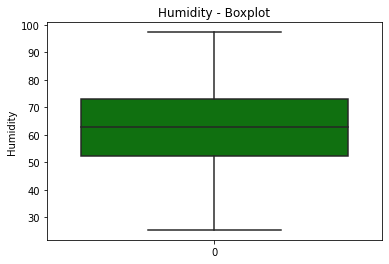

In [26]:
sns.boxplot(data=df['Humidity'],color='green')
plt.title('Humidity - Boxplot')
plt.ylabel('Humidity')
plt.show()
#observation
# as you can see the outliers has been treated

In [27]:
df['Windspeed'].describe()

count    728.000000
mean      12.727880
std        5.139840
min        1.500244
25%        9.031466
50%       12.125057
75%       15.624735
max       29.584721
Name: Windspeed, dtype: float64

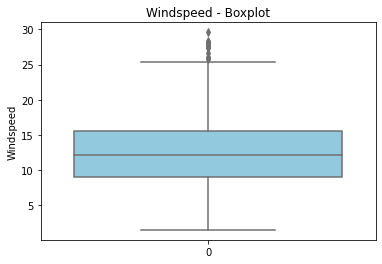

In [28]:
sns.boxplot(data=df['Windspeed'],color='skyblue')
plt.title('Windspeed - Boxplot')
plt.ylabel('Windspeed')
plt.show()
#observation
# As we can see there are no outliers
# Mean windspeed lies between 10-15
# There are some values above higher threshold but they are not outliers

# SEGMENTED UNIVARIATE ANALYSIS

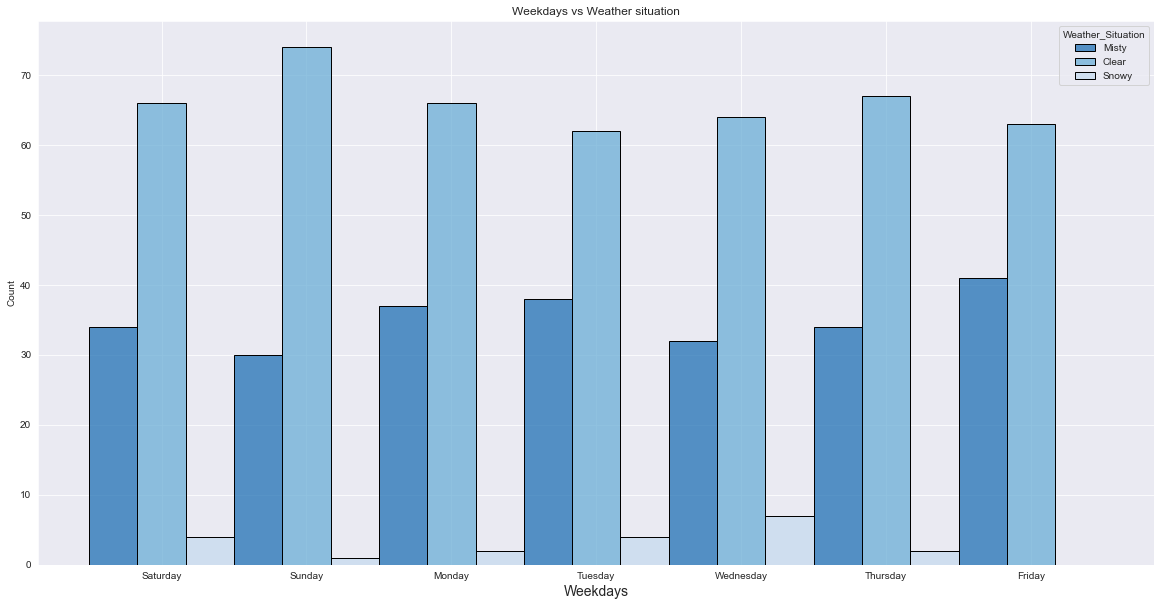

In [29]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.histplot(x = df['Weekday'],hue=df['Weather_Situation'],palette='Blues_r',edgecolor='black',multiple='dodge')
plt.title('Weekdays vs Weather situation')
plt.xlabel('Weekdays',fontsize = 14)
plt.show()
#observation
# As you can see there is a more clear weather during every day through out the data


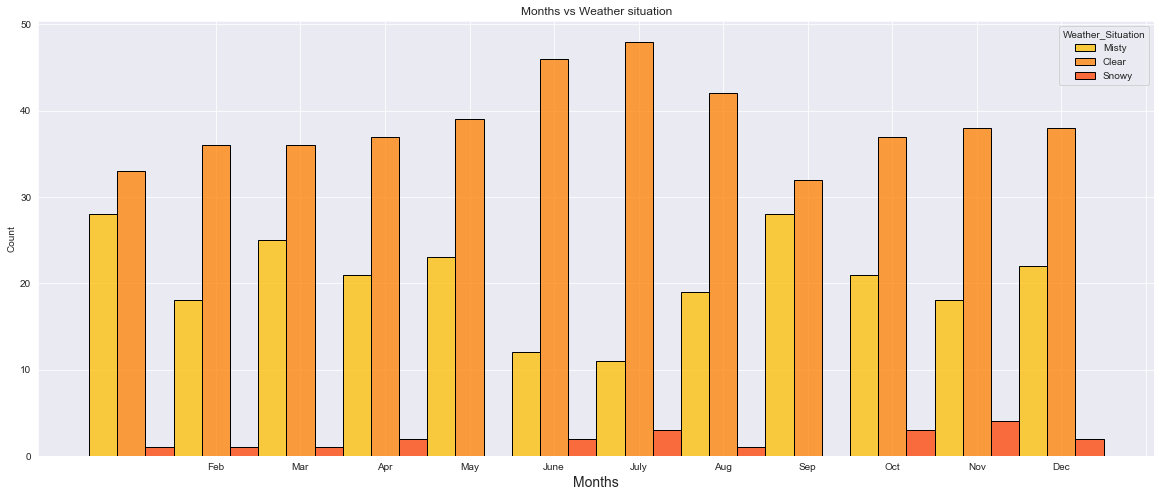

In [30]:
plt.figure(figsize=(20,8))
sns.histplot(x = df['Month'],hue=df['Weather_Situation'],palette='autumn_r',edgecolor='black',multiple='dodge')
plt.title('Months vs Weather situation')
plt.xlabel('Months',fontsize = 14)
plt.xticks(np.arange(1,13,1))
plt.show()
#observation
# We can see that here also clear/cloudy weather dominates all over the months

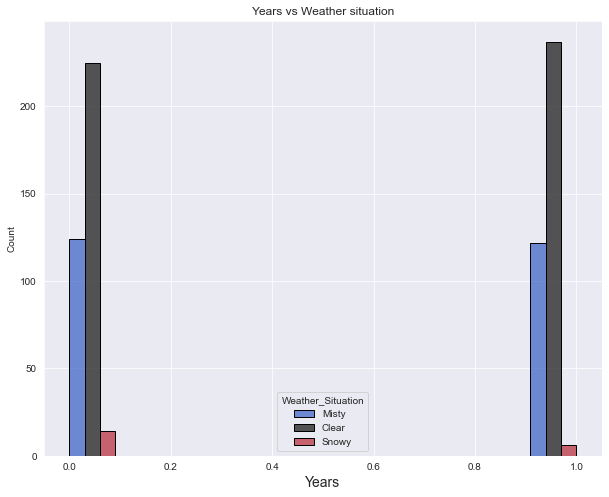

In [31]:
plt.figure(figsize=(10,8))
sns.histplot(x = df['Year'],hue=df['Weather_Situation'],palette='icefire',edgecolor='black',multiple='dodge')
plt.title('Years vs Weather situation')
plt.xlabel('Years',fontsize = 14)
plt.show()
#observation
# when compared everywhere snowy weather is way less

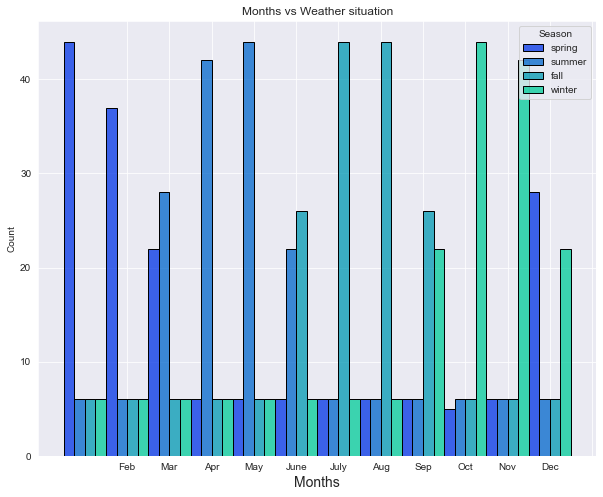

In [32]:
plt.figure(figsize=(10,8))
sns.histplot(hue= df['Season'],x=df['Month'],palette='winter',edgecolor='black',multiple='dodge')
plt.title('Months vs Weather situation')
plt.xlabel('Months',fontsize = 14)
plt.xticks(np.arange(1,13,1))
plt.show()
#observation
# from 1-3 months it is spring season
# from 3-6 months it is summer season
# from 6-10 months it is fall season
# from 10-12 months it is winter season

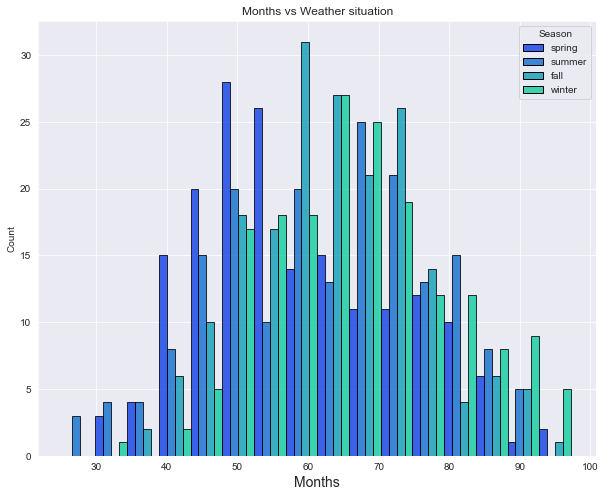

In [33]:
plt.figure(figsize=(10,8))
sns.histplot(hue= df['Season'],x=df['Humidity'],palette='winter',edgecolor='black',multiple='dodge')
plt.title('Months vs Weather situation')
plt.xlabel('Months',fontsize = 14)
plt.show()
#observation

# BI VARIATE ANALYSIS

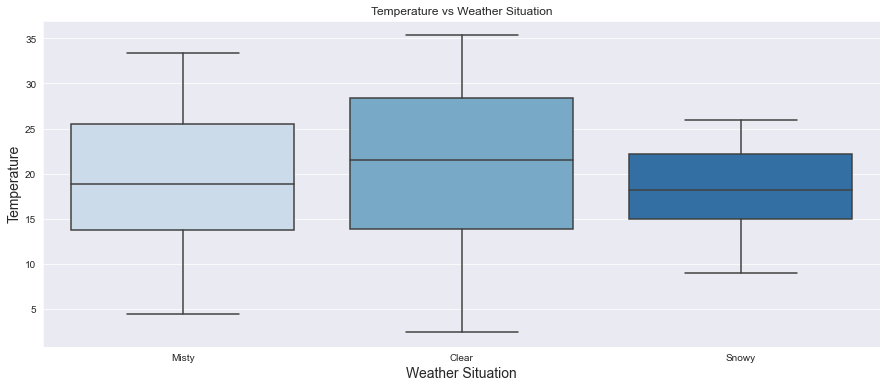

In [34]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,y='Temperature', x='Weather_Situation',palette='Blues')
plt.title('Temperature vs Weather Situation')
plt.ylabel('Temperature',fontsize = 14)
plt.xlabel('Weather Situation',fontsize = 14)
plt.show()
#observation
# Snowy weather has been of the shortest duration amon all of them 
# the mean temperature of clear/cloudy weather is higher than all of them

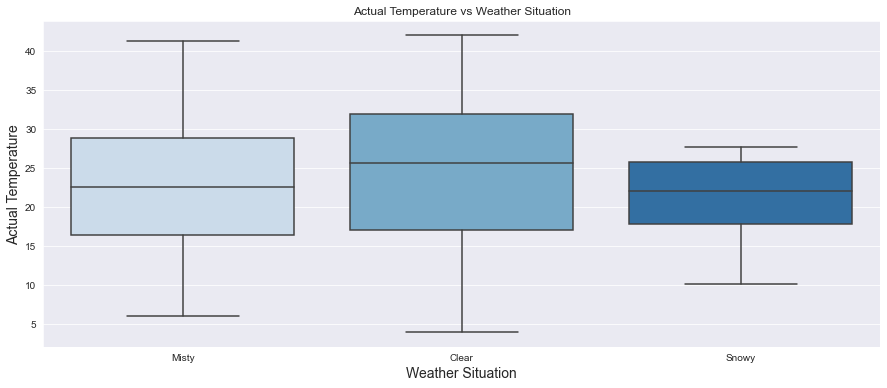

In [35]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,y='Actual_Temperature', x='Weather_Situation',palette='Blues')
plt.title('Actual Temperature vs Weather Situation')
plt.ylabel('Actual Temperature',fontsize = 14)
plt.xlabel('Weather Situation',fontsize = 14)
plt.show()
#observation
# when compared to the predicted temperature , Actual temperature has seen a steady increase in all three categories
# even the higher and lower threshold increased for all the three categories

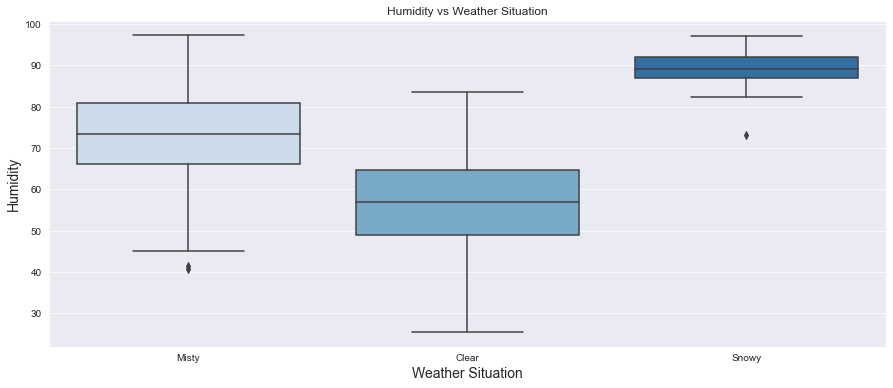

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,y='Humidity', x='Weather_Situation',palette='Blues')
plt.title('Humidity vs Weather Situation')
plt.ylabel('Humidity',fontsize = 14)
plt.xlabel('Weather Situation',fontsize = 14)
plt.show()
#observation
# As you can see there is some data below the lower thresh hold but I choose to keep it for linear regression model
# Humidity is way higher in snowy weather than misty and clear weather

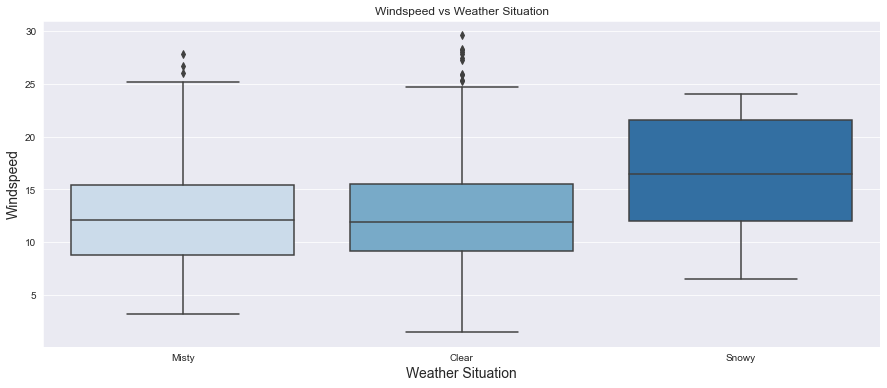

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,y='Windspeed', x='Weather_Situation',palette='Blues')
plt.title('Windspeed vs Weather Situation')
plt.ylabel('Windspeed',fontsize = 14)
plt.xlabel('Weather Situation',fontsize = 14)
plt.show()
#observation
# As you can see there is some data above the higher thresh hold but I choose to keep it for linear regression model
# Windspeed is argubly higher in snowy weather than misty and clear weather

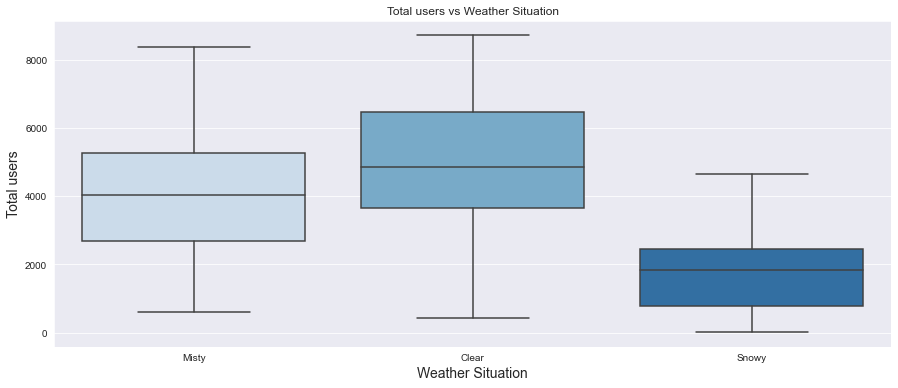

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,y='Total_Count', x='Weather_Situation',palette='Blues')
plt.title('Total users vs Weather Situation')
plt.ylabel('Total users',fontsize = 14)
plt.xlabel('Weather Situation',fontsize = 14)
plt.show()
#observation
# According to the weather situation More no of bikes are being used during the clear weather 
# and the least being used in the snowy weather

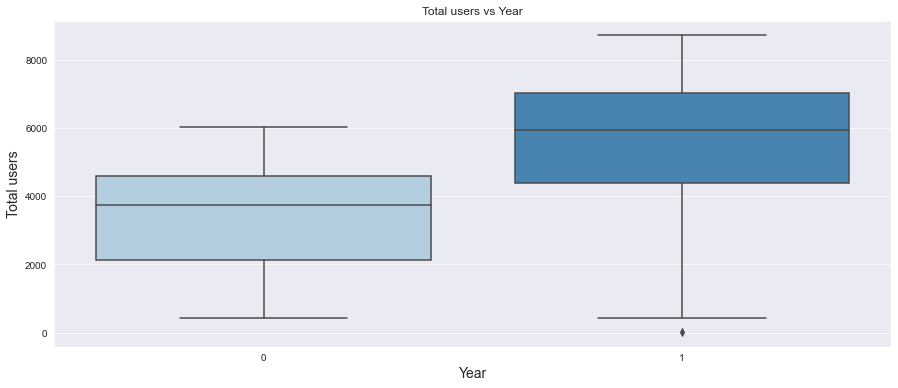

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,y='Total_Count', x='Year',palette='Blues')
plt.title('Total users vs Year')
plt.ylabel('Total users',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.show()
#observation
# As you can see there is a drastic change in users from 2018 to 2019
# the change is so high that the Higher threshold of 2018 is the mean of 2019

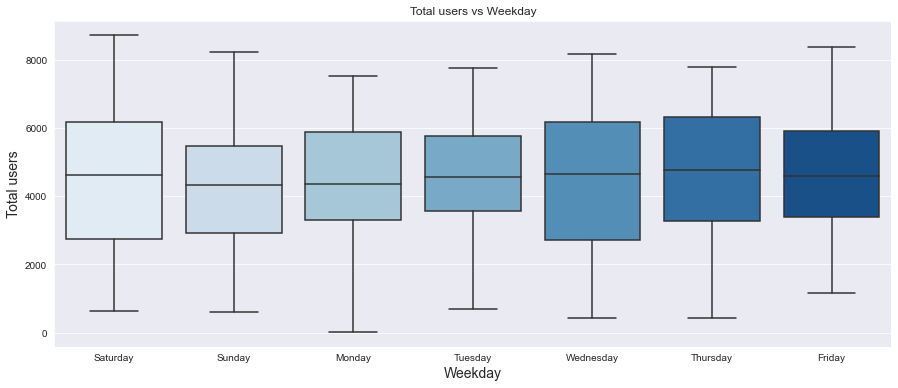

In [40]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,y='Total_Count', x='Weekday',palette='Blues')
plt.title('Total users vs Weekday')
plt.ylabel('Total users',fontsize = 14)
plt.xlabel('Weekday',fontsize = 14)
plt.show()
#observation
# almost all the means are equally around each other 
# But saturday and sunday has the highest higher threshold value

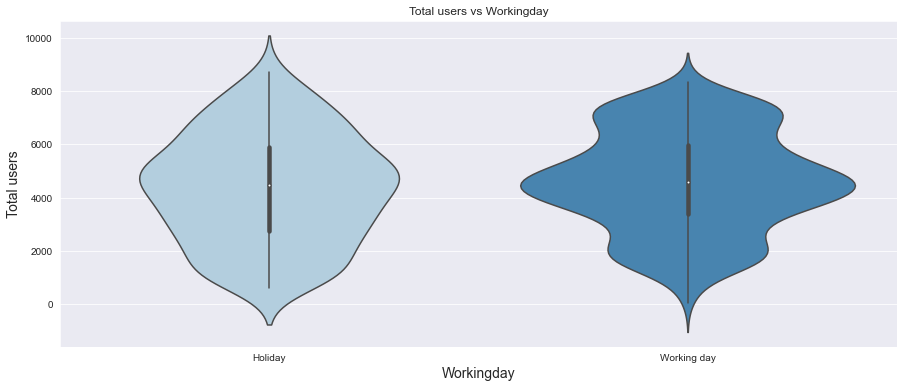

In [41]:
plt.figure(figsize=(15,6))
sns.violinplot(data = df,y='Total_Count', x='Workingday',palette='Blues')
plt.title('Total users vs Workingday')
plt.ylabel('Total users',fontsize = 14)
plt.xlabel('Workingday',fontsize = 14)
plt.show()
#observation
# As you can see there is no big difference between each other

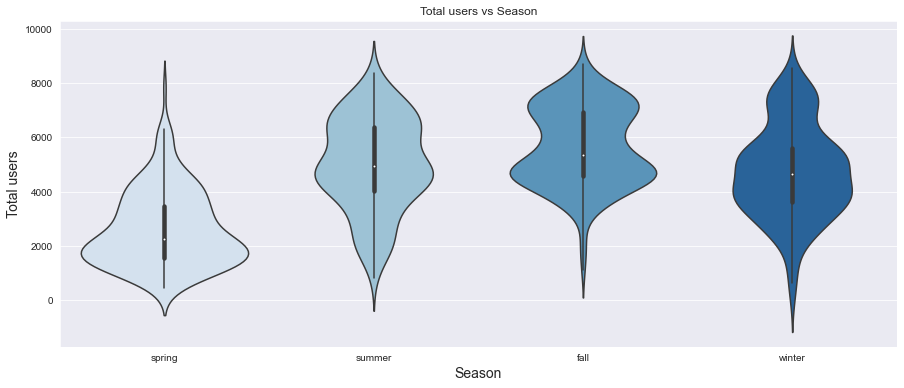

In [42]:
plt.figure(figsize=(15,6))
sns.violinplot(data = df,y='Total_Count', x='Season',palette='Blues')
plt.title('Total users vs Season')
plt.ylabel('Total users',fontsize = 14)
plt.xlabel('Season',fontsize = 14)
plt.show()
#observation
# The least usage has been depicted around spring season and 
# # the most usage has been depicted in summer and fall seasons 

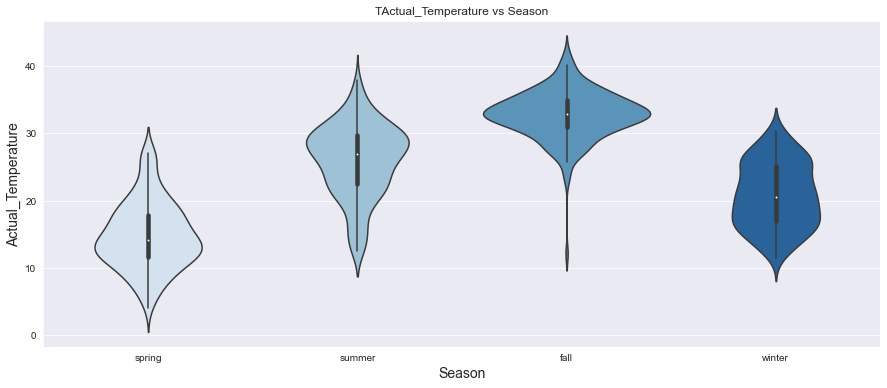

In [43]:
plt.figure(figsize=(15,6))
sns.violinplot(data = df,y='Actual_Temperature', x='Season',palette='Blues')
plt.title('TActual_Temperature vs Season')
plt.ylabel('Actual_Temperature',fontsize = 14)
plt.xlabel('Season',fontsize = 14)
plt.show()
#observation
# the temperature is way less in spring and winter
# so the decrease in the usage of vehicles

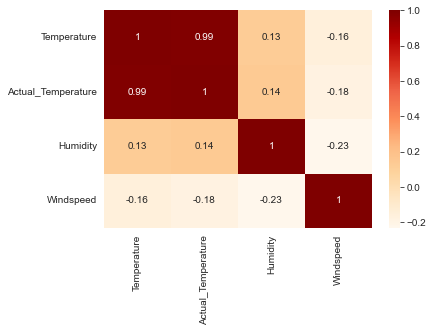

In [44]:
d = df[['Temperature','Actual_Temperature','Humidity','Windspeed']]
sns.heatmap(data = d.corr() , annot=True,cmap='OrRd')
plt.show()
# as you can see Temperature and actual temperature are highl correlated so dropping temperature column

In [45]:
df.drop(['Actual_Temperature'],axis=1,inplace=True)
# dropping actual temperature because it is unneccesary and it is highly co related with temperature

In order to build a model changing all the required variables into numericals

In [46]:
df_linmodel = df
# invoking a ned df for linear model building

# Creating Dummy variables

In [47]:
Dvar1 = pd.get_dummies(df_linmodel['Season'])
#observation
# if in any variable if 1 is present then it is that season
# Fall spring winter summer
#  1    0       0       0
# the above means Fall respective with others

In [48]:
Dvar2 = pd.get_dummies(df_linmodel['Month'])
Dvar3 = pd.get_dummies(df_linmodel['Weekday'])
Dvar4 = pd.get_dummies(df_linmodel['Workingday'])
Dvar5 = pd.get_dummies(df_linmodel['Weather_Situation'])

In [49]:
# Appending all the values
df_linmodel = pd.concat([df_linmodel,Dvar1,Dvar2,Dvar3,Dvar4,Dvar5],axis=1)

In [50]:
df_linmodel.drop(['Season','Month','Weekday','Workingday','Weather_Situation'],axis=1,inplace=True)
# dropping the columns not required
# dropping year because it is only for 2018 and 2019 and it is not continouos

In [51]:
#similarly dropping a single variable in each created model because 
# lets say in season, I droped fall 
# if spring,winter,summer are 0 then fall will be 1, so there will be no loss even if we drop the data
# its similiar in the case of rest 4 variables
df_linmodel.drop(['spring','Jan','Monday','Holiday','Snowy'],axis=1,inplace=True)

In [52]:
df_linmodel.head()

,Year,Temperature,Humidity,Windspeed,Total_Count,fall,summer,winter,Apr,Aug,...,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Working day,Clear,Misty
0,0,14.110847,80.5833,10.749882,985,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,14.902598,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,8.200000,59.0435,10.739832,1562,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
4,0,9.305237,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


# Splitting data set in to train and test models

In [53]:
from sklearn.model_selection import train_test_split
# this is specified so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_linmodel, train_size = 0.7, test_size = 0.3, random_state = 100)
# we are taking 70% training data set and 30% test data set

# Rescaling the feautres by using Min-Max method

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
#Applying scaling functions to everything except which are in the format of yes/no or particular variables such as years months etc
vars = ['Temperature', 'Humidity', 'Windspeed','Total_Count']

df_train[vars] = scaler.fit_transform(df_train[vars])


In [56]:
df_train.head()
#oservation
#as you can see everything is in the range of 0 and 1 so it will be easy to create a regression model

,Year,Temperature,Humidity,Windspeed,Total_Count,fall,summer,winter,Apr,Aug,...,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Working day,Clear,Misty
728,1,0.245101,0.319025,0.772556,0.204096,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
481,1,0.496388,0.204176,0.764739,0.714565,0,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
113,0,0.651106,0.774941,0.375373,0.479636,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
629,1,0.736253,0.546404,0.604317,0.963300,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
535,1,0.901354,0.470417,0.179101,0.712034,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [57]:
df_train.describe()
# as you can see the count is 510 because we have split the data in to test and train

,Year,Temperature,Humidity,Windspeed,Total_Count,fall,summer,winter,Apr,Aug,...,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Working day,Clear,Misty
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.506876,0.537164,0.529901,0.374965,0.512550,0.259332,0.245580,0.253438,0.068762,0.094303,...,0.074656,0.153242,0.143418,0.145383,0.131631,0.127701,0.141454,0.679764,0.609037,0.359528
std,0.500445,0.226375,0.199051,0.195571,0.224155,0.438699,0.430854,0.435408,0.253298,0.292537,...,0.263094,0.360575,0.350844,0.352833,0.338421,0.334085,0.348832,0.467026,0.488446,0.480334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.336479,0.383410,0.230522,0.355844,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.533770,0.527262,0.353572,0.516452,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.736253,0.669954,0.487485,0.678900,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


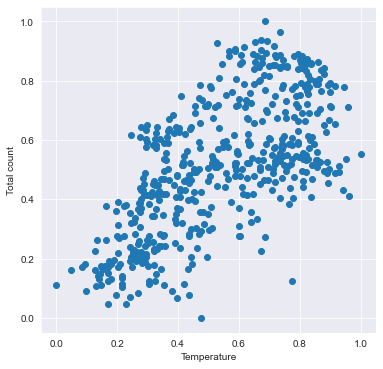

In [58]:
# As you can see total_count and temperature is correlated
plt.figure(figsize=[6,6])
plt.scatter(df_train['Temperature'], df_train['Total_Count'])
plt.xlabel('Temperature')
plt.ylabel('Total count')
plt.show()


Dividing in to X and Y data sets for model

In [59]:
y_train = df_train.pop('Total_Count')
X_train = df_train
# as total count is the target variable

# BUILDING A MODEL

In [60]:
import statsmodels.api as sm

# Adding a constant
X_train_lm = sm.add_constant(X_train[['Temperature']])

# Creating a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [61]:
lr.params

const          0.162791
Temperature    0.651120
dtype: float64

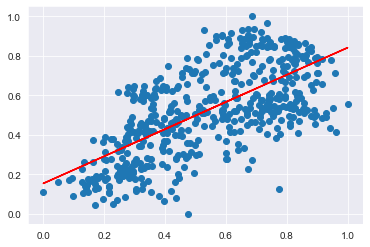

In [62]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.162791 + 0.651120*X_train_lm.iloc[:, 1], 'r')
plt.show()
#observation
# as you can see the regresion line fits properly

In [63]:
# Printing a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Count   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     386.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.40e-64
Time:                        00:54:40   Log-Likelihood:                 183.56
No. Observations:                 509   AIC:                            -363.1
Df Residuals:                     507   BIC:                            -354.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1628      0.019      8.430      

# EXTRACTING IMPORTANT VARIABLES USING RFE

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# using the rfe from sklearn to determine the important variables

In [65]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select = 15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
# creating a list of values according to rank

[('Year', True, 1),
 ('Temperature', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('fall', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Apr', False, 2),
 ('Aug', False, 5),
 ('Dec', False, 13),
 ('Feb', False, 9),
 ('July', False, 11),
 ('June', False, 4),
 ('Mar', True, 1),
 ('May', False, 3),
 ('Nov', False, 12),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Friday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 8),
 ('Tuesday', False, 10),
 ('Wednesday', False, 7),
 ('Working day', True, 1),
 ('Clear', True, 1),
 ('Misty', True, 1)]

In [67]:
op = X_train.columns[rfe.support_]
op
# Taking columns in to seperate list

Index(['Year', 'Temperature', 'Humidity', 'Windspeed', 'fall', 'summer',
       'winter', 'Mar', 'Oct', 'Sep', 'Saturday', 'Sunday', 'Working day',
       'Clear', 'Misty'],
      dtype='object')

In [68]:
X_train_rfe = X_train[op]
# Extracting the required columns

In [69]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_rfe).fit()
print(lr1.summary())
# Here you can see that almost all the P values are equal to zero and few of them are way high
# and also the R squared value is 0.842

                            OLS Regression Results                            
Dep. Variable:            Total_Count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.20e-186
Time:                        00:54:42   Log-Likelihood:                 508.54
No. Observations:                 509   AIC:                            -985.1
Df Residuals:                     493   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1183      0.046     -2.597      

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
X_train_rfe = X_train_rfe.drop('const',axis=1)
# Dropping Constant for VIF calculation

In [72]:
vif = pd.DataFrame()
x = X_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Here we can see there are multiple values greater than 5

,Features,VIF
1,Temperature,23.53
12,Working day,16.89
13,Clear,12.25
2,Humidity,11.17
14,Misty,7.76
4,fall,6.61
3,Windspeed,4.55
11,Sunday,4.51
10,Saturday,4.41
5,summer,3.51


In [73]:
x = X_train_rfe.drop(['Sunday'],axis=1)
X_train_rfe = sm.add_constant(x)
lr2 = sm.OLS(y_train,X_train_rfe).fit()
print(lr2.summary())
# dropping sunday because it has a p value of 0.338

                            OLS Regression Results                            
Dep. Variable:            Total_Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.63e-187
Time:                        00:54:43   Log-Likelihood:                 508.06
No. Observations:                 509   AIC:                            -986.1
Df Residuals:                     494   BIC:                            -922.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0986      0.041     -2.426      

In [74]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Temperature,23.53
2,Humidity,9.65
12,Clear,8.24
4,fall,6.59
13,Misty,6.20
11,Working day,4.55
3,Windspeed,4.23
5,summer,3.50
6,winter,2.71
0,Year,2.09


In [75]:
x=x.drop(['Oct'],axis=1)
X_train_rfe = sm.add_constant(x)
lr3 = sm.OLS(y_train,X_train_rfe).fit()
print(lr3.summary())
# here P value of Oct is 0.177 lets drop it

                            OLS Regression Results                            
Dep. Variable:            Total_Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          6.21e-188
Time:                        00:54:43   Log-Likelihood:                 507.12
No. Observations:                 509   AIC:                            -986.2
Df Residuals:                     495   BIC:                            -927.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0997      0.041     -2.452      

In [76]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Temperature,23.15
2,Humidity,9.64
11,Clear,8.22
4,fall,6.54
12,Misty,6.19
10,Working day,4.55
3,Windspeed,4.23
5,summer,3.47
6,winter,2.56
0,Year,2.09


In [77]:
x=x.drop(['Mar'],axis=1)
X_train_rfe = sm.add_constant(x)
lr4 = sm.OLS(y_train,X_train_rfe).fit()
print(lr4.summary())
# here P value of March is bz it has p value 

                            OLS Regression Results                            
Dep. Variable:            Total_Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.92e-188
Time:                        00:54:43   Log-Likelihood:                 504.80
No. Observations:                 509   AIC:                            -983.6
Df Residuals:                     496   BIC:                            -928.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0876      0.040     -2.169      

In [78]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Temperature,23.13
2,Humidity,9.64
10,Clear,8.10
4,fall,6.54
11,Misty,6.07
9,Working day,4.54
3,Windspeed,4.21
5,summer,3.45
6,winter,2.56
0,Year,2.08


In [79]:
x=x.drop(['Humidity'],axis=1)
X_train_rfe = sm.add_constant(x)
lrr = sm.OLS(y_train,X_train_rfe).fit()
print(lrr.summary())
# dropping humidity and lets check if there is any reduction in VIF

                            OLS Regression Results                            
Dep. Variable:            Total_Count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.6
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.17e-185
Time:                        00:54:44   Log-Likelihood:                 496.11
No. Observations:                 509   AIC:                            -968.2
Df Residuals:                     497   BIC:                            -917.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1980      0.031     -6.407      

In [80]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# There is a drop in VIF

,Features,VIF
1,Temperature,20.14
9,Clear,7.97
3,fall,6.42
10,Misty,4.97
8,Working day,4.41
2,Windspeed,4.21
4,summer,3.44
5,winter,2.46
0,Year,2.06
7,Saturday,1.72


In [82]:
x = x.drop(['fall'],axis=1)
X_train_rfe = sm.add_constant(x)
lr5 = sm.OLS(y_train, X_train_rfe).fit()
print(lr5.summary())
# dropping fall and lets check if there is any reduction in VIF

                            OLS Regression Results                            
Dep. Variable:            Total_Count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.79e-182
Time:                        00:54:51   Log-Likelihood:                 485.28
No. Observations:                 509   AIC:                            -948.6
Df Residuals:                     498   BIC:                            -902.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2041      0.032     -6.478      

In [83]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# there is major drop in VIF

,Features,VIF
8,Clear,7.73
1,Temperature,6.38
9,Misty,4.81
7,Working day,4.40
2,Windspeed,4.14
0,Year,2.05
6,Saturday,1.71
3,summer,1.53
4,winter,1.46
5,Sep,1.11


In [84]:
x = x.drop(['Misty'],axis=1)
X_train_lm = sm.add_constant(x)
lr6 = sm.OLS(y_train, X_train_lm).fit()
print(lr6.summary())
# dropping Mist and lets check if there is any reduction in VIF

                            OLS Regression Results                            
Dep. Variable:            Total_Count   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     230.5
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.85e-171
Time:                        00:55:15   Log-Likelihood:                 456.90
No. Observations:                 509   AIC:                            -893.8
Df Residuals:                     499   BIC:                            -851.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0121      0.020     -0.601      

In [85]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# almost all values are around 5 lets go to residual analysis of the data

,Features,VIF
1,Temperature,5.01
7,Working day,3.84
2,Windspeed,3.50
8,Clear,2.46
0,Year,1.99
6,Saturday,1.57
3,summer,1.52
4,winter,1.41
5,Sep,1.10


# RESIDUAL ANALYSIS OF THE DATA

In [86]:
X_train_new = X_train_lm.drop('const',axis=1)

In [87]:
y_train_pred = lr6.predict(X_train_lm)

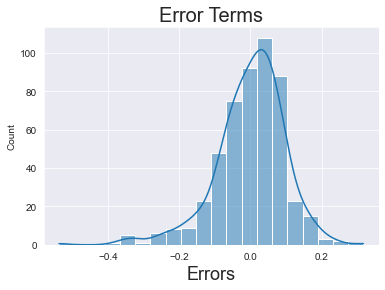

In [88]:
fig = plt.figure()
sns.histplot((y_train - y_train_pred), bins = 20,kde=True)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   
plt.show()
# As you can see it is a normal curve

# MAKING PREDICTIONS

In [89]:
vars = ['Temperature', 'Humidity', 'Windspeed','Total_Count']

df_test[vars] = scaler.transform(df_test[vars])


Dividing in to x and y sets

In [90]:
X_test = df_test
y_test = df_test.pop('Total_Count')

Using our model to make predictions

In [91]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 241 to 425
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        219 non-null    float64
 1   Year         219 non-null    int64  
 2   Temperature  219 non-null    float64
 3   Windspeed    219 non-null    float64
 4   summer       219 non-null    uint8  
 5   winter       219 non-null    uint8  
 6   Sep          219 non-null    uint8  
 7   Saturday     219 non-null    uint8  
 8   Working day  219 non-null    uint8  
 9   Clear        219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.8 KB


In [92]:
y_test_pred = lr6.predict(X_test_new) 

Text(0, 0.5, 'y_pred')

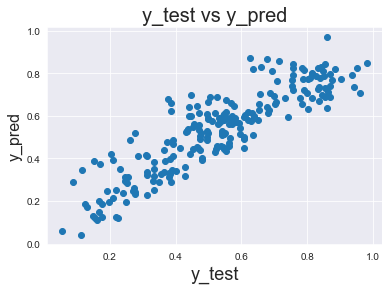

In [93]:
# Plotting y_test and y_pred to Analyze
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)  
# as you can see the data is spread evenly and increasing normally

In [96]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_test_pred)
r2
# Calculating R^2 value

0.7791945622246954

In [97]:
# N is number of rows in X
N = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(N-1)/(N-p-1)
adjusted_r2

0.7479812280889193

# FINAL REPORT

Test R^2 value = 0.780 \
Train R^2 value = 0.806 \
Adjusted test R^2 value = 0.748 \
Adjusted Train R^2 value = 0.803

# IMPORTANT VARIABLES

1) Temperature = it is the most important variable in the entire data set and it has a coefficient value of 0.5790 which says that a unit increase in temperature variable increases the bike sales by 0.5790 units. \
2) Year = year variable has seen a major increase from the year 2018 to 2019 in a major way and that too at  a rate of 0.2324 \
3) Summer, saturday, workingdays, Clear weather have a mild effect on the sales of the bikes

# NEGATIVE EFFECT VARIABLES

Windspeed effects the bikes sales by nearly 1.0 unit and Misty weather has also has an adverse effect on the Bike sales.

# ANALYSIS AND WHY DID WE DO IT

1) It is important to use drop_first=True or dropping the first variable during dummy variable creation because during VIF(Variance Inflation Factor) will become infinity if we don't drop it. 

2) Looking at the pair-plot among the numerical variables, Actual Temperature , Temperature and Fall has the highest correlation with the target variable(Total_Count) . We dropped one among actaul temperature and temperature because they both are highly co related. 

3) the top 3 features contributing significantly towards explaining the demand of the shared bikes\
    a) Temperature \
    b) Year \
    c) Windspeed(negative effect) \
    d) Clear weather
    
4) We perform scaling on the variables that are required to get them into a uniform way [0,1] in normalization or min max scaling. where as standardization uses standard deviation. 

5) I have observed that sometimes the value of VIF is infinite because if we not drop one among the dummy values created we get this error.


